In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install corextopic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy.sparse as ss
import matplotlib.pyplot as plt
import pandas as pd

import corextopic.corextopic as ct
import corextopic.vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [ ]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Conduct an exploratory screening of the dataset provided
    
df = pd.read_excel("/content/drive/MyDrive/Minmin 506/Project/redditPosts_v4.xlsx", sheet_name='Vaccinated')                               
df.rename(columns={"data": "Text"}, inplace=True)


In [ ]:
df1 = df[['Text']]
df1['Text'] = df1['Text'].astype(str).str.lower()
df1.head()

<ipython-input-8-0b5a0c7e0a8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Text'] = df1['Text'].astype(str).str.lower()


,Text
0,"fully vaccinated and 3 years not getting it, n..."
1,fully vaccinated but got covid with severe sym...
2,my experience with covid-19 (17f double vaccin...
3,"vaccinated twice, first time infected, lacerat..."
4,fully vaccinated with booster 1 month ago. hor...


In [ ]:
# Transform 20 newsgroup data into a sparse matrix
vectorizer = CountVectorizer(stop_words='english', max_features=20000, binary=True)
doc_word = vectorizer.fit_transform(df1.Text)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words



(614, 6686)

In [ ]:
# Get words that label the columns (needed to extract readable topics and make anchoring easier)
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [ ]:
print(words)

['00', '000', '000iu', '00pm', '01', '02', '03', '04', '05', '06', '07', '07pm', '08', '09', '10', '100', '1000', '1000mg', '100bmp', '100f', '100mg', '101', '101f', '102', '102f', '103', '1030am', '103f', '104', '105', '10am', '10hours', '10mo', '10pm', '10th', '11', '110', '111', '115', '119', '11m', '11mo', '11pm', '11th', '12', '120', '120bpm', '125', '12hrs', '12noon', '12th', '12yr', '13', '130', '13hrs', '13th', '14', '140', '141', '14th', '15', '150', '1500', '150bpm', '157', '15am', '15cm', '15l', '15pm', '15th', '16', '160', '165', '16th', '17', '175', '1763', '17f', '17th', '18', '180s', '184', '189', '18th', '19', '19f', '19m', '19th', '19y', '1am', '1br', '1c', '1h', '1hr', '1ish', '1m', '1pm', '1r2sbfogyko8gme3h9dey8o646mj2lbxittnuaa8m8nv7soahpaxfm9xo6qabhhbavlgusq1yztaa21dpdnb2pcohdwq7gcw5aslvn60', '1r2sbfogyko8gme3h9dey8o646mj2lbxittnuaa8m8nv7soahpaxfm9xo6qabhhbavlgusq1yztaa21dpdnb2pcohdwq7gcw5aslvn60_bxbc_l2toos', '1st', '1x', '20', '200', '2000', '2000iu', '200mg', '2

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(614, 6549)

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words

(614, 6549)

CorEx Topic Model

Anchoring for Semi-Supervised Topic Modeling

In [ ]:
anchor_words = [['fever', 'cough', 'cold', 'congestion', 'fatigue'], 
                ['paxlovid', 'vitamin', 'hospital', 'advil', 'acetaminophen'], 
                ['friend', 'school', 'club', 'family', 'mask'], 
                ['isolation', 'miss', 'away', 'avoid', 'work'], 
                ['nervous', 'anxiety', 'worry', 'depress', 'stress']]
anchored_topic_model = ct.Corex(n_hidden=5, seed=2)
anchored_topic_model.fit(doc_word, words=words, anchors=anchor_words, anchor_strength=6);


In [ ]:
for n in range(len(anchor_words)):
    topic_words,_,_ = zip(*anchored_topic_model.get_topics(topic=n))
    print('{}: '.format(n) + ', '.join(topic_words))

0: cough, fever, congestion, fatigue, cold, throat, sore, headache, woke, night
1: paxlovid, hospital, advil, vitamin, mucus, continued, acetaminophen, prescribed, taking, stay
2: mask, family, school, friend, wear, wearing, house, club, angry, masks
3: work, away, avoid, went, thought, got, came, point, feel, miss
4: anxiety, stress, nervous, worry, trying, health, sure, heart, room, today


In [ ]:
anchored_topic_model.get_topics(topic=4, n_words=10, print_words=True)

[('anxiety', 1.1381896825066145, 1.0),
 ('stress', 0.2535135043266256, 1.0),
 ('nervous', 0.1774936497420988, 1.0),
 ('worry', 0.16651428816101876, 1.0),
 ('trying', 0.03639558015873795, 1.0),
 ('health', 0.0347990876481481, 1.0),
 ('sure', 0.029617021171262914, 1.0),
 ('heart', 0.028296657248766843, 1.0),
 ('room', 0.027536142783837952, 1.0),
 ('today', 0.026338155769088267, 1.0)]

In [ ]:
abc=anchored_topic_model.get_topics(print_words=True)
print(abc)

[[('cough', 1.8868132179345969, 1.0), ('fever', 1.6239741694752492, 1.0), ('congestion', 1.073777403985635, 1.0), ('fatigue', 0.6955928831746769, 1.0), ('cold', 0.6638853420051463, 1.0), ('throat', 0.1816811503823867, 1.0), ('sore', 0.17230140781239844, 1.0), ('headache', 0.1495537607664985, 1.0), ('woke', 0.12860557665846664, 1.0), ('night', 0.12343761962601035, 1.0)], [('paxlovid', 0.6682933648878933, 1.0), ('hospital', 0.26635232975298384, 1.0), ('advil', 0.2641458277385248, 1.0), ('vitamin', 0.2382061920508608, 1.0), ('mucus', 0.04852753469032314, 1.0), ('continued', 0.03906233822885635, 1.0), ('acetaminophen', 0.03905868151346563, 1.0), ('prescribed', 0.03504119619417595, 1.0), ('taking', 0.03472243012398091, 1.0), ('stay', 0.03285777107490956, 1.0)], [('mask', 1.7038849313847726, 1.0), ('family', 1.0344423209485394, 1.0), ('school', 0.20049106242064396, 1.0), ('friend', 0.18757186695920003, 1.0), ('wear', 0.06352731121056526, 1.0), ('wearing', 0.06090456211420803, 1.0), ('house',

In [ ]:
vacscore2 = []
for i in range(5):
  values = [x[1] for x in abc[i]]
  mean_value = np.mean(values)
  vacscore2.append(mean_value)
print(vacscore2)

[0.6699622531821066, 0.16662676662559744, 0.3409021851749096, 0.18157718755867264, 0.19186937695161996]


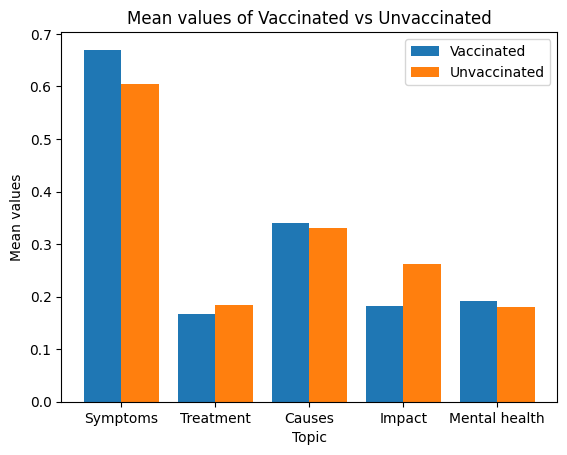

In [ ]:
X = topict
unvacscore2 = [0.6047425939697805, 0.18492861883783007, 0.33103307965450224, 0.26245748856245055, 0.17966246773577]
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, vacscore2, 0.4, label = 'Vaccinated')
plt.bar(X_axis + 0.2, unvacscore2, 0.4, label = 'Unvaccinated')
  
plt.xticks(X_axis, X)
plt.xlabel("Topic")
plt.ylabel("Mean values")
plt.title("Mean values of Vaccinated vs Unvaccinated")
plt.legend()
plt.show()